<a href="https://colab.research.google.com/github/thatguyshzr/stable_diffusion_notebook/blob/main/Stable_Diffusion_with_%F0%9F%A7%A8_diffusers_No_Filter_SHZR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github repo

https://github.com/thatguyshzr/stable_diffusion_notebook

### Prerequisite (one time setup)
You'll need access to the weights
- Make an account here: https://huggingface.co
- Go to https://huggingface.co/CompVis/stable-diffusion-v1-4
- Click ```Access Repository```
- Go to https://huggingface.co/settings/tokens
- Click ```New Token```
- ```Name``` = whatever you want; ```Role``` = write; Click ```Generate a Token```

Copy that token


### Setup
Need to run this cell only once.

Should take 15-25 seconds to run.

Check if GPU active

In [1]:
from tensorflow import test
assert test.is_gpu_available(), "In taskbar, click 'Runtime' > 'Change runtime type' > 'Hardware accelerator'=GPU"
print('GPU selected.')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU selected.


In [2]:
print('Importing packages')
!pip install diffusers==0.2.4
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

Importing packages
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import output
output.enable_custom_widget_manager()

### Access the weights
- Run this cell
- Paste the token (you can find your token here https://huggingface.co/settings/tokens)
- Click login

In [4]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


#### Stable Diffusion Pipeline
Should take about 40-60 seconds. Depends on you net speed.

In [5]:
import torch
from diffusers import StableDiffusionPipeline

print('Creating pipeline....')
# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", 
                                            #    revision="fp16", torch_dtype=torch.float16, 
                                               use_auth_token=True) 
print('Pipeline created.')

Creating pipeline....
Pipeline created.


In [6]:
filter_out_nsfw = False #@param {type:"boolean"}
#@markdown Tick to block NSFW content.
def dummy(images, **kwargs): return images, filter_out_nsfw 
pipe.safety_checker = dummy


In [7]:
pipe = pipe.to("cuda")



---


### No need to run the above cells again.

### Make images
These are some recommendations to choose good image sizes:
- Make sure `height` and `width` are both multiples of `8`.
- Going below 512 might result in lower quality images.
- Going over 512 in both directions will repeat image areas (global coherence is lost).
- The best way to create non-square images is to use `512` in one dimension, and a value larger than that in the other one.

0it [00:00, ?it/s]

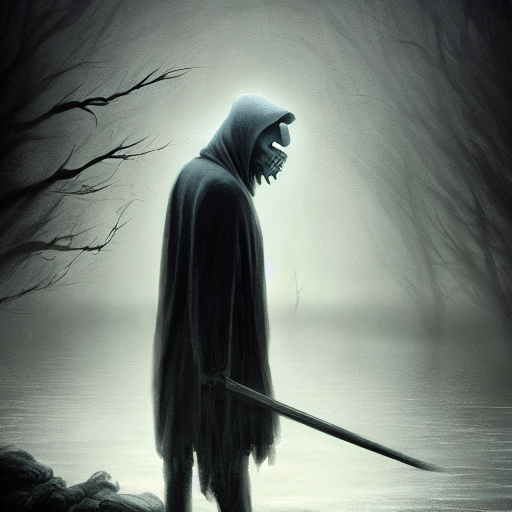

In [8]:
from torch import autocast

num_images = 1 #@param {type:"number"}
prompt_text= "dream portrait of grim reaper standing on edge of river of souls, foggy vibe, intricate, cinematic lighting, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration,4k, 8k, 32k, uhd" #@param {type:"string"}
width= 512 #@param {type:"number"}
height= 512 #@param {type:"number"}

prompt = [prompt_text] * num_images

with autocast("cuda"):
  images = pipe(prompt, width= width, height= height)["sample"]

for i in images: display(i)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

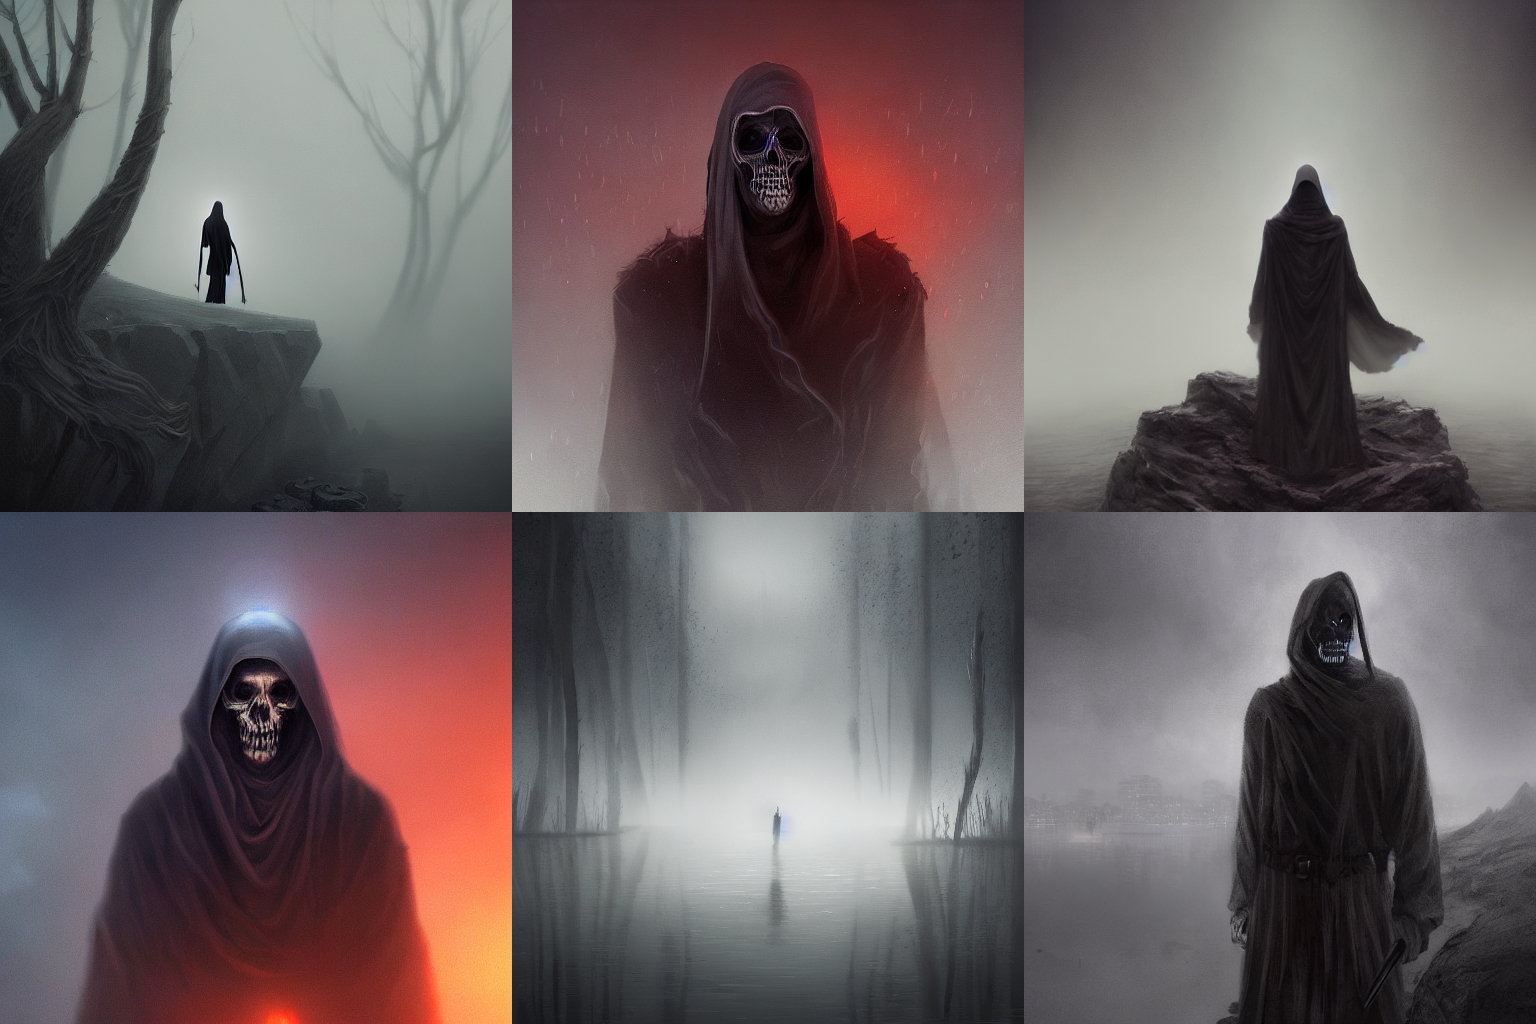

In [9]:
from PIL import Image
#@title Collage of images
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
        
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

num_cols = 3 #@param {type:"integer"}
num_rows = 2 #@param {type:"integer"}
prompt_text= "dream portrait of grim reaper standing on edge of river of souls, foggy vibe, intricate, cinematic lighting, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration,4k, 8k, 32k, uhd" #@param {type:"string"}
width= 512 #@param {type:"integer"}
height= 512 #@param {type:"integer"}

prompt = [prompt_text] * num_cols

all_images = []
for i in range(num_rows):
    with autocast("cuda"):
      images = pipe(prompt, width= width, height= height)["sample"]
    all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid